# <center> Adaboost

- [1. Giới thiệu](#1.-Giới-thiệu)
- [2. Ý tưởng chính](#2.-Ý-tưởng-chính)
    - [Mô hình hóa thuật toán Adaboost](#Mô-hình-hóa-thuật-toán-Adaboost)
- [3. Demo đơn giản](#3.-Demo-đơn-giản)
- [4. Kết luận](#4.-Kết-luận)
    - [4.1 Ưu điểm](#4.1-Ưu-điểm)
    - [4.2 Nhược điểm](#4.2-Nhược-điểm)
- [5. Tài liệu tham khảo](#5.-Tài-liệu-tham-khảo)

# 1. Giới thiệu

Ở phần trước, chúng ta đã làm quen với kỹ thuật Bagging. Phần này sẽ giới thiệu về Boosting, cũng giống như Bagging, Boosting là một kỹ thuật ensemble learning.

Nhắc lại về Ensemble learning: ensemble learning là kỹ thuật kết hợp nhiều mô hình khác nhau tạo thành một siêu mô hình có hiệu suất cao hơn từng mô hình đơn lẻ. Trong thực tế, khi giải quyết những vấn đề phức tạp thì ta thường tham khảo ý kiến của nhiều chuyên gia để đưa ra kết luận cuối cùng. Ensemble learning cũng hoạt  động dựa trên ý tưởng đó. 


Hiểu rõ hơn về Boosting thông qua Bagging:
- Cả hai đều là kết hợp của N mô hình nhưng không phụ thuộc lẫn nhau với Bagging; Đối với Boosting mô hình mới cố gắng học những điều mà mô hình trước đó làm sai nhiều hơn dữ liệu khác. Từ đó có thể thấy Boosting chỉ có thể được huấn luyện tuần tự còn Bagging có thể huấn luyện song song.
- Cả hai mô hình đều tạo bộ dữ liệu mới cho mỗi mô hình con một cách ngẫu nhiên. Tuy nhiên, Boosting thêm trọng số để có thể tạo ra dữ liệu có nhiều trường hợp khó hơn (trường hợp sai trong mô hình trước nó).
- Cả hai đều ra quyết định dựa vào trung bình quyết định của N mô hình con hoặc lấy ý kiến số đông. Đối với Bagging, quyết định của mỗi mô hình con có mức đóng góp ngang nhau tạo nên quyết định cuối cùng. Đối với Boosting, quyết định cuối cùng bị ảnh hưởng của những mô hình có hiệu suất cao nhiều hơn (mô hình có hiệu suất cao được tin tưởng / có trọng số cao hơn).
- Trong khi boosting cố giảm bias và có xu hướng làm tăng hiện tượng quá khớp thì Bagging có thể  giải quyết tình trạng quá khớp.

**Mô hình hóa Boosting**:
- Cho một mô hình học một phần của dữ liệu.
- Một mô hình khác học phần dữ liệu mà mô hình trước nó chưa học, đồng thời gộp với 50% dữ liệu mà mô hình trước nó dự đoán sai.
- Tiếp tục nhưng vậy với nhiều mô hình nữa rồi tổng hợp lại.

# 2. Ý tưởng chính

Xuất phát từ ý tưởng của Boosting, tuy nhiên Adaboost khác với Boosting ở chổ  nó sử dụng toàn bộ dữ liệu để huấn luyện từng mô hình con với trọng số được phân phối lại sau mỗi lần huấn luyện sao cho mô hình sau quan tâm nhiều hơn đến những lỗi sai của mô hình trước.

| ![Lọc thư rác](https://raw.githubusercontent.com/TheDuyIT/Introduce-to-machine-learing/master/images/10/mota_ada.png) | 
|:--:| 
| *Mô tả thuật toán* |



- Ở hình 1, tất cả điểm dữ liệu được gán trọng số bằng nhau và được phân chia bằng đường nét đứt.
- Ở hình 2, hai điểm bị dự đoán sai được gán trọng số cao hơn để tiếp tục huấn luyện. Mô hình tiếp theo sẽ chú trọng vào điểm dữ liệu có trọng số cao - điểm dữ liệu khó học.
- Ở hình 3, trọng số tiếp tục được phân phối lại. 3 điểm dữ liệu bị dự đoán sai tăng trọng số , đồng thời giảm trọng số của 2 điểm dữ liệu (nhắc đến ở bước 2) đã dự đoán đúng.
- Ở hình 4, giả sử mô hình Adaboost của chúng ta chỉ có 3 mô hình con, thì mô hình cuối cùng có thể được mô tả như hình 4.

## Mô hình hóa thuật toán Adaboost

Giả định rằng thuật toán phân loại 2 lớp có giá trị 1 và -1:
- **Gán trọng số  cho tất cả các điểm dữ liệu ($\sum_i w_i = 1, w_i = w_k$).** : bước khởi tạo, trọng số được gán bằng nhau cho tất cả các điểm dữ liệu.
- **Với mỗi lần boosting:**
  - **Huấn luyện mô hình con $C_i = train(X, y, w)$**.
  - **Dự đoán nhãn: $\hat{y} = predict(Cj, X)$.**
  - **Tính tổng lỗi: $\epsilon = \sum_i w_i.(\hat{y_i} != y_i)$**. Tổng lỗi có độ lớn trong [0, 1], khi tất cả dự đoán đúng thì tổng lỗi bằng 0 và ngược lại.
  - **Tính hệ số  $a_i = 0.5 \log{\frac{1 - \epsilon}{\epsilon}}$.** Hệ số $a_i$ tượng trưng cho "tiếng nói" của mô hình thứ $i$, khi mô hình có ít dự đoán sai, $\epsilon$ sẽ thấp do đó mô hình đóng góp nhiều cho dự đoán cuối cùng.

| ![Tổng lỗi - a](https://raw.githubusercontent.com/TheDuyIT/Introduce-to-machine-learing/master/images/10/totalerror_a1.png) | 
|:--:| 
| *Tổng lỗi - a* |


  - **Cập nhật trọng số  $w = w * exp(- a_i * \hat{y} * y)$.** Khi $\hat{y} = y$ thì công thức trở thành $w = w * exp(- a_i)$, theo biểu đồ bên dưới thì mô hình có $a_i$ cao thì w càng nhỏ, và ngược lại. Tương tự đối với $\hat{y} != y$ thì công thức trở thành $w = w * exp(a_i)$, $a_i$ càng cao thì w càng cao và ngược lại.
  - **Chuẩn hoá trọng số : $w = \frac{w}{\sum_i w_i}$**
- **Dự đoán kết quả như sau: $\hat{y} = (\sum_{i = 1}^N (a_i * predict(C_i, X)) > 0)$**

# 3. Demo đơn giản


So sánh sự khác nhau giữa cây quyết định với Adaboost 300 estimators:

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
rng = np.random.RandomState(1)

# Tạo tập dữ liệu X, y
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)
regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

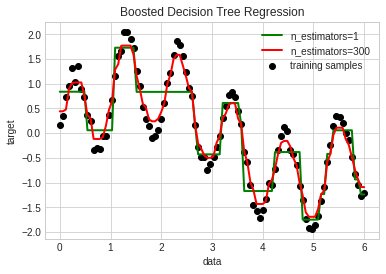

In [45]:
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()
plt.show()

# 4. Kết luận

## 4.1 Ưu điểm

- Có thể sử dụng Adaboost trên nền của nhiều thuật toán khác nhau (base_estimator) một cách dễ  dàng.

## 4.2 Nhược điểm

- Bị ảnh hưởng bởi dữ liệu nhiễu.
- Các mô hình con có hiệu suất quá kém dẫn đến hiệu suất kém cho cả mô hình.
- Dễ dẫn đến hiện tượng quá khớp.

# 5. Tài liệu tham khảo

$^{[1]}$ [Sebastian Raschka, Vahid Mirjalili, Python Machine Learning - Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, 3rd Edition, Packt Publishing (2019)](https://www.packtpub.com/data/python-machine-learning-third-edition)


$^{[2]}$ [Quantdare.com: What is the difference between Bagging and Boosting?](https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/#:~:text=Both%20are%20ensemble%20methods%20to,well%20where%20previous%20models%20fail.&text=On%20the%20other%20hand%2C%20Bagging,while%20Boosting%20can%20increase%20it.)


